# Python Review

What we expect you to know already. If this is all new, ask for help during exercises.

## Data types
- **int** (1, 10, -25)
- **float** (0.1, 3.14)
- **string** ("Hello, World!")
- **bool** (True, False)

## Data structures

- **list** An ordered set of elements
- **dictionary** An unordered key / value store. Each value can be accessed indexing into the key, e.g. `python_dict['a']`

## Operators

In [ ]:
1 + 1  # 2

12 / 4  # 3.0

1 == 2  # False

10 != 0  # True

not False  # True

True and False  # False

False or True  # True

## Variables

In [ ]:
x = 5

x + 10

x = 0

## Control Statements

Remember, white space is necessary in python.

In [ ]:
x = 20

if x == 3:
    print('x is 3!')
elif x > 0:
    print('x is greater than 0!')
else:
    print('x is something else!')
    
for number in [1, 2, 3, 4, 5]:
    print(number)
    
my_dict = {'key1':'val1', 'key2':'val2'}
    
for key in my_dict:
    print(key)
    print(my_dict[key])
    
while x > 0:
    print(x)
    x = x - 1

## Exercise 1

In [124]:
#If you are stuck, google or ask for help!

python_list = [1,2,3,7]
python_dict = {'a':3, 'd':5}

# Print each number in the list

for item in python_list:
    print(item)

# Print each value in the dictionary


for key in python_dict:
    print(python_dict[key])

1
2
3
7
3
5


# JSON

A way to store data (lists, dictionaries, etc) in a string or file format. An example and exercise is below.

In [125]:
import json

json_example = '''
{
    "created_at": "Wed Nov 06 23:58:55 +0000 2019",
    "text": "Kleenex® Brand Underscores Importance of #Skin Care This Cold &amp; Flu Season  #skincare #beautytips  https://t.co/PWqB6MmQVw",
    "is_quote_status": false,
    "quote_count": 0,
    "reply_count": 0,
    "retweet_count": 3,
    "favorite_count": 5,
    "entities": {
        "hashtags": [
            {
                "text": "Skin",
                "indices": [41,46]
            },
            {
                "text": "skincare",
                "indices": [80,89]
            },
            {
                "text": "beautytips",
                "indices": [90,101]
            }
        ]
    },
    "favorited": false,
    "retweeted": false
}
'''

## Exercise 2

In [137]:
# Load the JSON example above (don't forget to run the cell) using
# the json.loads() function
# Remember, this will turn the json into a python dictionary

#print(json.loads(json_example))
# Print how many times the tweet was retweeted ("retweet_count")

json_parsed = json.loads(json_example)
print(json_parsed['retweet_count'])

# Print the hashtags in the tweet

for hashtag in json_parsed['entities']['hashtags']:
    print(hashtag['text'])

3
Skin
skincare
beautytips


# Don't repeat yourself

A common programming tip is to not repeat code. If you find yourself copying and pasting the same code over and over, it's best to make a function. This way you only change it in one place, when you need to change it. Below is an example of a function.

In [138]:
# This function adds one to the value that was passed in and prints it
def add_one(a):
    b = a + 1
    return b

## Exercise 3

Write a function that takes the example JSON string above and returns the retweet count

In [140]:
# Write your function here
def get_retweet_count(item):
    tweet = json.loads(item)
    return tweet['retweet_count']

print(get_retweet_count(json_example))

3


# Saving and Loading JSON to a file

Many times it's not convenient to keep on hitting a URL for a JSON, maybe the website is too slow or there is a limit on how many times a user can access it. In these cases, it's best to save the JSON to a file and read it. Below is an example of writing to a file.

In [144]:
import os
print(os.getcwd())
test_file = open('myfile.txt', 'w')
test_file.write('I am a text file!')
test_file.close()

/home/knas/codes/tweet/repo


## Exercise 4

In [158]:
# Save the JSON to a file named 'example.json'
print(json_parsed)
json_file = open('hello.json', 'w')
json.dump(json_parsed, json_file)
json_file.close()
# INSERT CODE HERE

# Load the JSON back from 'example.json' (using json.load)
with open('hello.json') as json_file:
    json.load(json_file)

# INSERT CODE HERE

{'created_at': 'Wed Nov 06 23:58:55 +0000 2019', 'text': 'Kleenex® Brand Underscores Importance of #Skin Care This Cold &amp; Flu Season  #skincare #beautytips  https://t.co/PWqB6MmQVw', 'is_quote_status': False, 'quote_count': 0, 'reply_count': 0, 'retweet_count': 3, 'favorite_count': 5, 'entities': {'hashtags': [{'text': 'Skin', 'indices': [41, 46]}, {'text': 'skincare', 'indices': [80, 89]}, {'text': 'beautytips', 'indices': [90, 101]}]}, 'favorited': False, 'retweeted': False}


# Accessing the Twitter API

We are going to access www.twitter.com and use the search feature. Here is an example of what we will do with, but with code.


## Package Requirements

We need to install the following packages into your Python environment

In [ ]:
# Run this cell to install the needed packages
import sys
!{sys.executable} -m pip install requests requests_oauthlib stylecloud pandas matplotlib

## What is an API?

An API (Application Programmer Interface) is a way a website/app allows a user to programmatically access data.

## Other ways of accessing data

1. Copy and paste data into a spreadsheet (or plain text file) and read with Python package `csv` or `pandas` (or if it's a text file, then loop through the lines) 

1. Scrape/parse the HTML with Python package *Beautiful Soup* (or equivalent)

## API vs. Other Methods

An API is more organized and the way the app wants you to access its data. However many websites or apps don't have an API, or it is too poorly designed. In those cases, it's better to use a more crude approach.

# API Authentication

We need to get the tokens from the Twitter development website, but first there are some steps involved and some forms to fill out.

## Exercise 5

1. Go to https://developer.twitter.com/en/apply/user.html

1. Login to your Twitter account or create a new user

1. Fill out the forms and select you are applying for educational use. It doesn't really matter what you write down as long as you meet the word length. Go through the entire process

1. After that is complete, click on your to your name at the top right corner, next to *Dashboard* (not *Dashboard* but next to it) and select *Apps*, then click on *Keys and Tokens*

1. Write down the four keys below

In [265]:
# Write down your api keys here
API_KEY = ''
API_SECRET = ''
ACCESS_TOKEN = ''
ACCESS_TOKEN_SECRET = ''

## Exercise 6

Now go here to create a new dev environment https://developer.twitter.com/en/account/environments and select *30 Day* (Search API). Write down the name of your environment below.

In [266]:
# Write the environment name below
DEV_ENVIRONMENT_NAME = ''


# Twitter Search API

Now we are ready to use _requests_ to access the api. _requests_ is a Python package used to access a URL and get the website data back.

In [173]:
import requests
from requests_oauthlib import OAuth1

SEARCH_API_URL = 'https://api.twitter.com/1.1/tweets/search/30day/{}.json'.format(DEV_ENVIRONMENT_NAME)

# Authentication uses OAuth1 as referenced in Twitter documentation
auth = OAuth1(API_KEY, API_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

We are now ready to send a search query to twitter and get back the JSON response

## Exercise 7

Use the documentation here https://developer.twitter.com/en/docs/tweets/search/quick-start/premium-full-archive to figure out how to format your JSON data that you are sending to twitter. The data will be a python dictionary that the _requests_ library will convert to a JSON for you when sending the data.

In [261]:
query_data = {
                "query":"flu place:chicago -RT",
                "maxResults": "100",
    }



response = requests.post(SEARCH_API_URL, auth=auth, json=query_data)
response.json()

{'error': {'message': 'Request exceeds account’s current package request limits. Please upgrade your package and retry or contact Twitter about enterprise access.',
  'sent': '2019-11-22T04:45:33+00:00',
  'transactionId': '00dccc07009274df'}}

## Exercise 8

Now that we sent the request, we need to figure out how to get the result back into a python data type so we can read it. Use https://www.w3schools.com/python/module_requests.asp

In [ ]:
# Get the tweets from the requests response object
# See documentation at this link https://www.w3schools.com/python/ref_requests_response.asp
tweets = response.json()
print(tweets)
#print(len(tweets['results']))

# The first result in the
#print(tweets)


# Query Operators

Different operators can be applied to the query to for example filter the search results by location. All operators are listed here https://developer.twitter.com/en/docs/tweets/rules-and-filtering/overview/premium-operators

For example if we wanted to search for _flu_ in *Chicago* we would have this code `"query":"flu place:chicago"` in our JSON

## Exercise 9

Make another search now but now use one of the operators linked above to have a more specific result.

In [ ]:
query = "flu place:chicago -RT" # no retweets

## Exercise 10

Collect all the tweets into one python string, use the sample code below

In [199]:
corpus = ''
for tweet in tweets['results']:
    corpus = corpus + '\n' + tweet['text']

print(corpus)


The flu sucks. 

But, #WhiteSox Twitter has been the much needed shot of adrenaline I’ve been seeking all week.
I hate shots, but there is no way in hell that I am getting the flu again
My favorite part of cold and flu season is when @jwojcik wreaks of Vick’s Vapo Rub and starts rocking that Demi Moore voice. #TurnsMeOn
💋🔥💋🔥💋🔥💋
hope u got ur flu shots, cuz im about to be extra HOT!

FRI - #MakeOutParty at @nocturnechicago w/… https://t.co/GR01rSUwfa
@AceGxd216 If you haven't had one in a while I suggest getting one. You may get sick but the symptoms would be way… https://t.co/XTrWipZ6RD
@quinncy I use the 1918 flu pandemic in my yearly plea to my two sons to get their flu shot. “But remember, in 1918… https://t.co/fIEp1rer8a
Woke up bc my stomach is hurting. Drank some water. Now, I’m laying in bed wondering if it’s bc: 1) I ate late bc o… https://t.co/SkxVtshGet
Had a dr's appt for 3:30 to get my flu shot. Office called me yesterday to say since I'm just getting a shot, they'… https:

## Exercise 11

We are going to convert the tweets into text a few times so we can process the next from different searches. Since we don't want to repeat ourself, write a function below that takes the query JSON and returns the text from all the tweets.

In [238]:
def get_text_from_search(query_data):
    query = {
                "query":query_data,
                "maxResults": "100",
    }
    response = requests.post(SEARCH_API_URL, auth=auth, json=query)
    tweets = response.json()
    corpus = ''
    for tweet in tweets['results']:
        corpus = corpus + '\n' + tweet['text']
    corpus = corpus.replace('http','')
    corpus = corpus.replace('co', '')
    return corpus
    
#print(get_text_from_search("flu place:chicago -RT"))
corpus = get_text_from_search("flu place:chicago -RT")

# Word Cloud

Now that we have some tweet results, we are going to collect all the text into one python string so we can make a word cloud

There are few python libraries that convert text to a word cloud. This one allows us to specify any shape from https://fontawesome.com/ so we will use the twitter logo

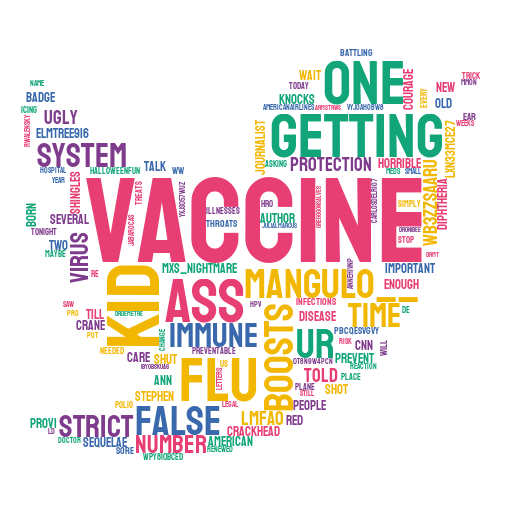

In [210]:
import stylecloud
from IPython.display import Image
import os

filename = 'wordcloud.png'

stylecloud.gen_stylecloud(text=corpus, icon_name='fab fa-twitter', output_name=filename)
Image(filename=filename)

## Exercise 12

Many times the sites we are interested in analyzing data from, do not have apis. Can you generate the word cloud using a more crude method? (Hint: One way is to copy and paste the text from twitter into a string and then pass that into the word cloud.)

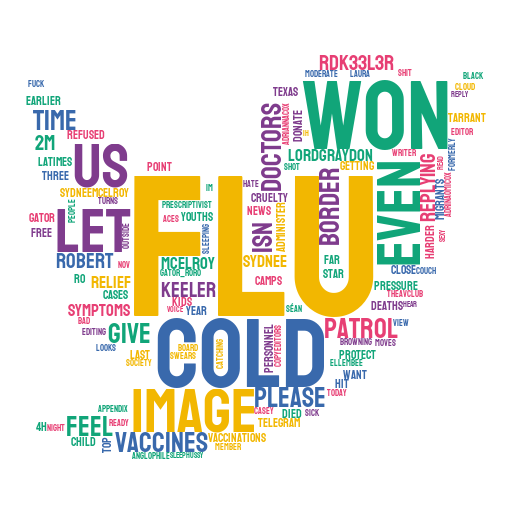

In [211]:
text_from_website ='''
Robert Keeler
@rdk33l3r
·
2m
Replying to 
@LordGraydon
& for relief of cold and flu symptoms!
Image
Sydnee McElroy
💖
💜
💙
@sydneemcelroy
·
4h
They won’t close the camps, they won’t protect the kids and they won’t even let us donate the flu vaccines and the time and personnel to give them. If the cruelty isn’t the point, what is?
After child deaths, doctors pressure Border Patrol to let them administer flu vaccines
After three youths died of the flu last year, doctors want to give free vaccinations to migrants — but Border Patrol has so far refused.
latimes.com
Top news
star-telegram.com
Tarrant, Texas getting hit earlier and harder by flu cases
gator-RO
👩🏼‍🚒
@Gator_RoRo
·
Nov 20
Turns out it isn’t the flu.... 
his appendix looks bad... 
I’m ready for this black cloud to get from above us.  
🙏
 
💔
Image
People
Laura M. Browning
💪🏻
💉
please get your flu shot
@ellembee
Writer, editor, Anglophile, moderate prescriptivist. Formerly @TheAVClub
. Board member, ACES: The Society for Editing @copyeditors
. Swears are my own. she/her
View all
AdriannaCox
@AdriNaomiCox
·
1m
I feel like shit I only moves once off this couch today I am sick as fuck and I feel like sleeping also It is night time for me and I am cold and outside isn't even cold I hate catching the flu
Séan Casey
@SleepHussy
·
1h
Please reply with what YOU would like to hear read in my Sexy Flu Voice

'''

stylecloud.gen_stylecloud(text=text_from_website, icon_name='fab fa-twitter', output_name=filename)
Image(filename=filename)

# Data Cleaning and Analysis

Now we will do some cleaning to the text. We didn't have to before because the wordlcoud package did that for you. However, now since we are doing a more specific analysis, we will have to clean the data.

## Exercise 12

Convert the text we have collected into lowercase

In [ ]:
corpus_lower = corpus.lower()
corpus_lower

We will replace newline characters with spaces and remove non alphabet characters.

In [217]:
import re
corpus_no_chars = ' '.join(corpus_lower.splitlines())
corpus_no_chars = re.sub(r'[^a-z ]', '', corpus_no_chars)
corpus_no_chars

' the flu sucks   but whitesox twitter has been the much needed shot of adrenaline ive been seeking all week i hate shots but there is no way in hell that i am getting the flu again my favorite part of ld and flu season is when jwojcik wreaks of vicks vapo rub and starts rocking that demi moore voice turnsmeon  hope u got ur flu shots cuz im about to be extra hot  fri  makeoutparty at nocturnechicago w stgrrsuwfa acegxd if you havent had one in a while i suggest getting one you may get sick but the symptoms would be way stxtrwipzrd quinncy i use the  flu pandemic in my yearly plea to my two sons to get their flu shot but remember in  stfieprera woke up bc my stomach is hurting drank some water now im laying in bed wondering if its bc  i ate late bc o stskxvtshget had a drs appt for  to get my flu shot office called me yesterday to say since im just getting a shot they stfptkhxdyu lmao update i have the swine flu what fuckin year is it me on day  of the flu have worn the same gray sweat

## Bar Plot

We will now make a bar plot of the word occurrances in the tweets, but first we need to create a function to count the word occurances.

## Exercise 13

Make a function that given the tweet text and a word, it cleans the text (using the code above) and counts the occurance of that word.

Use `str.count` to count the words. For example `'hello world'.count('hello')` will return `1`.

In [248]:
def clean_and_count(tweet_text, word):
    tweet_text = tweet_text.lower()
    tweet_text = ' '.join(tweet_text.splitlines())
    tweet_text = re.sub(r'[^a-z ]', '', tweet_text)
    return tweet_text.count(word)
    
corpus = get_text_from_search("flu place:chicago -RT")
clean_and_count(corpus, 'flu')


86

# Pandas

Pandas is a powerful python package for reading csv files, storing csv files, and analyzing or changing the data in them.

In addition from reading in a Dataframe from a csv file, we can also make our own using a dictionary like the following example.

In [245]:
import pandas

data = {'place':['chicago', 'detroit'], 'trump':[3,4], 'hilary':[5,3]}
df = pd.DataFrame(data)
df

,place,trump,hilary
0,chicago,3,5
1,detroit,4,3


## Exercise 14

Play around with the pandas syntax, look at this guide https://jalammar.github.io/gentle-visual-intro-to-data-analysis-python-pandas/

How do you print only the `place` column? How do you save it and read from csv?

In [244]:
df
df['place'] # Get one column
df.to_csv('hello.csv', index=False) # Write to csv with no line numbers (index)

## Exercise 15

Construct a dict to create a pandas dataframe similar to the example above. Use `clean_and_count` and fill the code below. 

If you get an error like *KeyError: 'results'* it means that Twitter thought you accessed too many times. Wait 15 minutes and save your JSON to a file.

In [ ]:
data = {}
words = ['trump', 'barr', 'stone', 'schiff', 'clinton', 'obama']
for word in words:
    places = ['chicago', 'texas', 'alabama', 'california']
    data[word] = [] # Here we initialize the list so we can append to it
    data['place'] = places # Here we initilize the places
    for place in places:
        # INSERT CODE HERE
        corpus = get_text_from_search("impeachment place:" + place) # Note this probably could be optimized so it doesn't keep on getting called
        word_count = clean_and_count(corpus, word)
        data[word].append(word_count)

new_df = pd.DataFrame(data)
new_df

# Plotting

Now we are ready to plot!

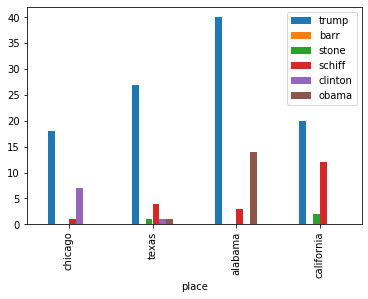

In [264]:
new_df.plot(kind='bar',x='place',y=words)